In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import cv2
%matplotlib inline

In [2]:
imgShar = cv2.imread('/Users/leisha/Desktop/classifier/model/test images/sharapova1.jpg')
imgShar.shape
#x, y, rgb channels

(555, 700, 3)

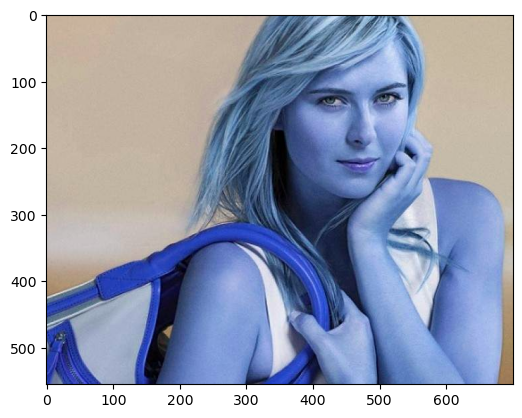

In [3]:
plt.imshow(imgShar)

In [4]:
gray = cv2.cvtColor(imgShar, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

In [5]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

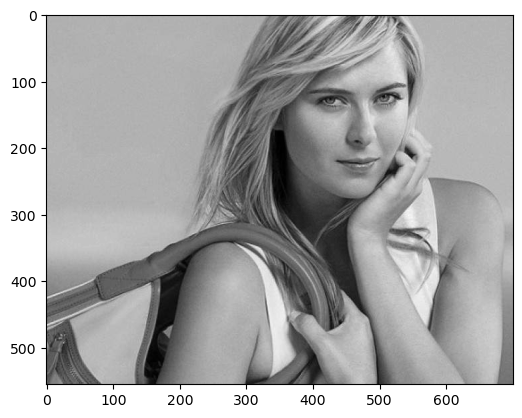

In [6]:
plt.imshow(gray, cmap = 'gray')

In [7]:
#use haar cascade to detect face and eye
face_cascade = cv2.CascadeClassifier('/Users/leisha/Desktop/classifier/model/opencv:haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/Users/leisha/Desktop/classifier/model/opencv:haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces
#x, y, width and height outputted

array([[352,  38, 233, 233]], dtype=int32)

In [8]:
(x, y, w, h) = faces[0]
x, y, w, h

(352, 38, 233, 233)

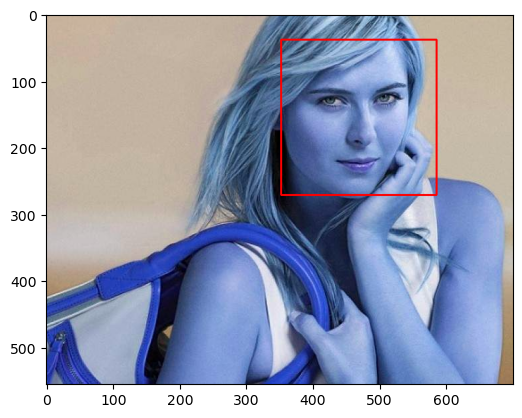

In [9]:
#drawing rectangle around face using the color red
face_img = cv2.rectangle(imgShar, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)

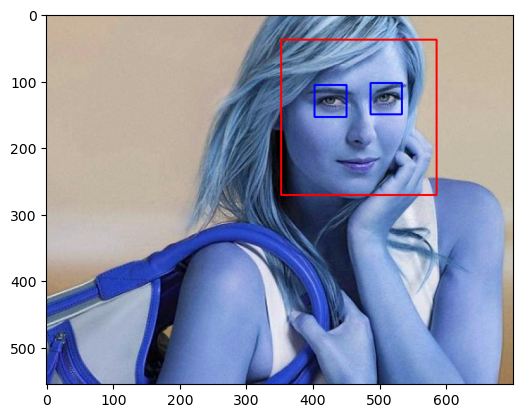

In [10]:
#mark eyes in blue color
cv2.destroyAllWindows()
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(imgShar, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    #rectangle region of the face
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 0, 255), 2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()


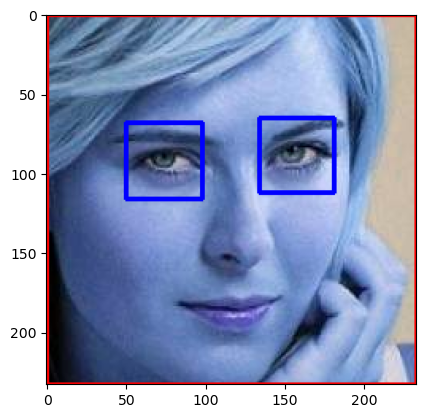

In [11]:

plt.imshow(roi_color, cmap='gray')

In [12]:
'''def getCroppedImg2Eyes(image_path):
    img = cv2.imread(image_path)
    if img.shape[1] > 1000:  # Resize only if the image is very large
        img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if img is None:
        print(f"Error loading image at {image_path}")
        return None  # or return an empty list if preferable
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    facesWithEyes = []

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            facesWithEyes.append(roi_color)

    return facesWithEyes'''
def getCroppedImg2Eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error loading image at {image_path}")
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
    facesWithEyes = []
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        # Try an alternative eye cascade for glasses (optional)
        #eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')
        # Adjust eye detection parameters
        eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.01, minNeighbors=2)
        # Only save faces with at least two eyes detected
        if len(eyes) >= 2:
            facesWithEyes.append(roi_color)
    
    return facesWithEyes



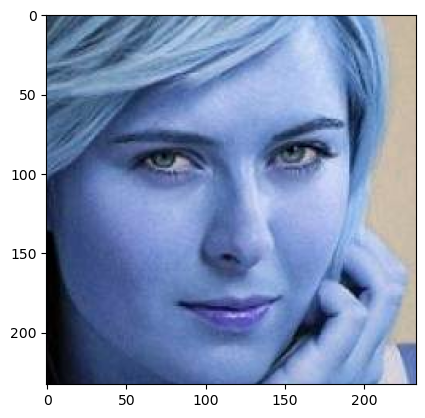

In [13]:
croppedImg = getCroppedImg2Eyes('/Users/leisha/Desktop/classifier/model/test images/sharapova1.jpg')
plt.imshow(croppedImg[0])

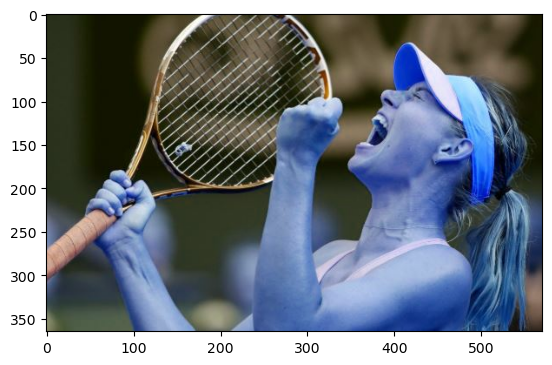

In [14]:
ogImg2 = cv2.imread('/Users/leisha/Desktop/classifier/model/test images/sharapova2.JPG')
plt.imshow(ogImg2)

In [15]:
#returns nothing cuz 2 eyes not found
croppedImg2 = getCroppedImg2Eyes('/Users/leisha/Desktop/classifier/model/test images/sharapova2.JPG')
croppedImg2

[]

In [16]:
pathToData = './dataset'
pathToCrData = './dataset/cropped/'

In [17]:
# will go through all subdirectories within dataset folder
import os
imgDirs = []
for entry in os.scandir(pathToData):
    if entry.is_dir():
        imgDirs.append(entry.path)

In [18]:
imgDirs

['./dataset/marissa mayer',
 './dataset/mark zuckerberg',
 './dataset/jeff bezos',
 './dataset/ginny rometty',
 './dataset/elon musk',
 './dataset/cropped']

In [19]:
# removes cropped folder if it exists- helps if we run code multiple times
import shutil
if os.path.exists(pathToCrData):
    shutil.rmtree(pathToCrData)
os.mkdir(pathToCrData)

In [20]:
croppedImgDir = []
fileNamesDict = {}
imgDirs2 = imgDirs[:-1]
count = 0

for imgDir in imgDirs2:
    name = imgDir.split('/')[-1]
    print(name)
    fileNamesDict[name] = []
    print("created new entry")
         
    for entry in os.scandir(imgDir):
        # Skip non-image files like .DS_Store
        if entry.name.startswith('.'):
            continue
        
        roiColor = getCroppedImg2Eyes(entry.path)
        print("detected faces")
        
        if roiColor is not None:
            print("roicolor")
            croppedFolder = pathToCrData + name
            # if folder does not exist
            if not os.path.exists(croppedFolder):
                os.makedirs(croppedFolder)
                croppedImgDir.append(croppedFolder)
                print("cropped images in folder: " + croppedFolder)

            for face in roiColor:
                croppedFileName = name + str(count) + ".png"
                croppedFilePath = croppedFolder + "/" + croppedFileName
                cv2.imwrite(croppedFilePath, face)
                fileNamesDict[name].append(croppedFilePath)
                count += 1
'''
for imgDir in imgDirs:
    name = imgDir.split('/')[-1]
    print(name)
    fileNamesDict[name] = []
    print("created new entry")
         
    for entry in os.scandir(imgDir):
        # Skip non-image files like .DS_Store
        if entry.name.startswith('.'):
            continue
        
        roiColor = getCroppedImg2Eyes(entry.path)
        print("detected faces")
        
        if roiColor is not None:
            print("roicolor")
            croppedFolder = pathToCrData + name
            # if folder does not exist
            if not os.path.exists(croppedFolder):
                os.makedirs(croppedFolder)
                croppedImgDir.append(croppedFolder)
                print("cropped images in folder: " + croppedFolder)

            for face in roiColor:
                croppedFileName = name + str(count) + ".png"
                croppedFilePath = croppedFolder + "/" + croppedFileName
                cv2.imwrite(croppedFilePath, face)
                fileNamesDict[name].append(croppedFilePath)
                count += 1

    '''
    

marissa mayer
created new entry
detected faces
roicolor
cropped images in folder: ./dataset/cropped/marissa mayer
detected faces
roicolor
detected faces
roicolor
detected faces
roicolor
detected faces
roicolor
detected faces
roicolor
detected faces
roicolor
detected faces
roicolor
detected faces
roicolor
detected faces
roicolor
detected faces
roicolor
detected faces
roicolor
detected faces
roicolor
detected faces
roicolor
detected faces
roicolor
detected faces
roicolor
detected faces
roicolor
detected faces
roicolor
detected faces
roicolor
detected faces
roicolor
detected faces
roicolor
detected faces
roicolor
detected faces
roicolor
detected faces
roicolor
detected faces
roicolor
detected faces
roicolor
detected faces
roicolor
mark zuckerberg
created new entry
detected faces
roicolor
cropped images in folder: ./dataset/cropped/mark zuckerberg
detected faces
roicolor
detected faces
roicolor
detected faces
roicolor
detected faces
roicolor
detected faces
roicolor
detected faces
roicolor


'\nfor imgDir in imgDirs:\n    name = imgDir.split(\'/\')[-1]\n    print(name)\n    fileNamesDict[name] = []\n    print("created new entry")\n         \n    for entry in os.scandir(imgDir):\n        # Skip non-image files like .DS_Store\n        if entry.name.startswith(\'.\'):\n            continue\n        \n        roiColor = getCroppedImg2Eyes(entry.path)\n        print("detected faces")\n        \n        if roiColor is not None:\n            print("roicolor")\n            croppedFolder = pathToCrData + name\n            # if folder does not exist\n            if not os.path.exists(croppedFolder):\n                os.makedirs(croppedFolder)\n                croppedImgDir.append(croppedFolder)\n                print("cropped images in folder: " + croppedFolder)\n\n            for face in roiColor:\n                croppedFileName = name + str(count) + ".png"\n                croppedFilePath = croppedFolder + "/" + croppedFileName\n                cv2.imwrite(croppedFilePath, face)\

In [21]:
#function taken from stackoverflow
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H


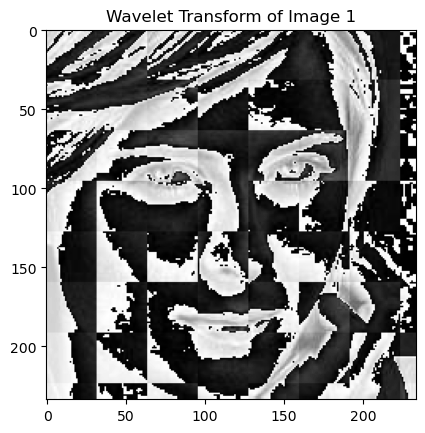

In [22]:
# Check if croppedImg contains multiple images or a single image
if isinstance(croppedImg, list):
    # If it's a list, apply wavelet transform to each image
    for i, img in enumerate(croppedImg):
        if img is not None:
            transformed_img = w2d(img, 'db1', 5)
            plt.imshow(transformed_img, cmap='gray')
            plt.title(f"Wavelet Transform of Image {i+1}")
            plt.show()
        else:
            print(f"Image {i+1} is empty or not valid.")
elif croppedImg is not None:
    # If it's a single image, apply wavelet transform directly
    transformed_img = w2d(croppedImg, 'db1', 5)
    plt.imshow(transformed_img, cmap='gray')
    plt.title("Wavelet Transform of Cropped Image")
    plt.show()
else:
    print("croppedImg is empty or not a valid image array.")

In [23]:
fileNamesDict

{'marissa mayer': ['./dataset/cropped/marissa mayer/marissa mayer0.png',
  './dataset/cropped/marissa mayer/marissa mayer1.png',
  './dataset/cropped/marissa mayer/marissa mayer2.png',
  './dataset/cropped/marissa mayer/marissa mayer3.png',
  './dataset/cropped/marissa mayer/marissa mayer4.png',
  './dataset/cropped/marissa mayer/marissa mayer5.png',
  './dataset/cropped/marissa mayer/marissa mayer6.png',
  './dataset/cropped/marissa mayer/marissa mayer7.png',
  './dataset/cropped/marissa mayer/marissa mayer8.png',
  './dataset/cropped/marissa mayer/marissa mayer9.png',
  './dataset/cropped/marissa mayer/marissa mayer10.png',
  './dataset/cropped/marissa mayer/marissa mayer11.png',
  './dataset/cropped/marissa mayer/marissa mayer12.png',
  './dataset/cropped/marissa mayer/marissa mayer13.png',
  './dataset/cropped/marissa mayer/marissa mayer14.png',
  './dataset/cropped/marissa mayer/marissa mayer15.png',
  './dataset/cropped/marissa mayer/marissa mayer16.png',
  './dataset/cropped/mar

In [24]:
#give number to each name
classDict = {}
count = 0
for name in fileNamesDict.keys():
    classDict[name] = count
    count += 1
classDict

{'marissa mayer': 0,
 'mark zuckerberg': 1,
 'jeff bezos': 2,
 'ginny rometty': 3,
 'elon musk': 4}

In [25]:
X = [] #stacked ig
Y = [] #name (number)

#vertically stack images
for personName, trainingFile in fileNamesDict.items():
    for trainingImg in trainingFile:
        #read and scale image so they are uniform in size
        img = cv2.imread(trainingImg)
        scaledRawImg = cv2.resize(img, (32, 32))
        imgHaar = w2d(img, 'db1', 5)
        scaledImgHaar = cv2.resize(imgHaar, (32, 32))
        #vertically stack them
        combinedImg = np.vstack((scaledRawImg.reshape(32*32*3, 1), scaledImgHaar.reshape(32*32, 1)))
        X.append(combinedImg)
        Y.append(classDict[personName])

In [26]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(105, 4096)

In [27]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.4444444444444444

In [65]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.67      0.67      0.67         6
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2

    accuracy                           0.44        27
   macro avg       0.27      0.31      0.29        27
weighted avg       0.37      0.44      0.40        27



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [67]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [74]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [76]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.600000,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.330833,{'randomforestclassifier__n_estimators': 1}
2,logistic_regression,0.563333,{'logisticregression__C': 1}


In [78]:
best_estimators['svm'].score(X_test,y_test)

0.7407407407407407

In [80]:
best_estimators['random_forest'].score(X_test,y_test)

0.25925925925925924

In [88]:
best_estimators['logistic_regression'].score(X_test,y_test)


0.8148148148148148

In [90]:
best_clf = best_estimators['logistic_regression']

Text(95.72222222222221, 0.5, 'Truth')

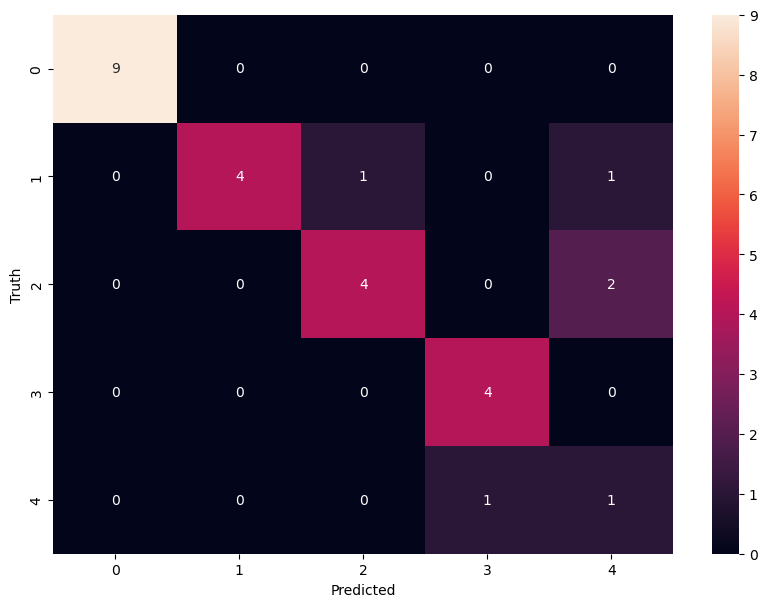

In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')